In [1]:
import gymnasium as gym
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
env = gym.make("FrozenLake-v1",
              desc = None,
              map_name = "4x4",
              is_slippery = False,
              success_rate=1.0/3.0,
              reward_schedule = (1,0,0),
              render_mode = "rgb_array"
)

In [3]:
print(env.observation_space)
print(env.action_space)

Discrete(16)
Discrete(4)


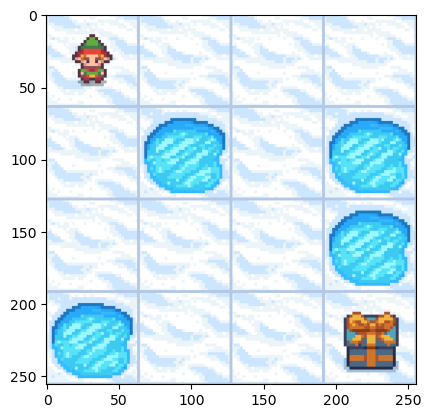

In [4]:
obs,info = env.reset()
img = env.render()
plt.imshow(img)

In [5]:
lr = 0.1
dis = 0.99
episodes = 15000
epsilon = 1
epsilon_dec = 0.9995
epsilon_min = 0.05
rewards = []
total_reward = 0

Q = np.zeros((env.observation_space.n,
                  env.action_space.n))

In [6]:
Q   #left down right up

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
# Q-table method lagako

for episode in range(episodes):
    state,_ = env.reset()  
    total_reward = 0
    done = False

    while not done:
        #e-greedy lagako
        if np.random.rand() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated,_ = env.step(action)
        done = terminated or truncated

        #q-table update (q learning apply gareko)

        Q[state,action] = Q[state,action] + lr*(reward + dis*np.max(Q[next_state])-Q[state,action])
        state = next_state
        total_reward += reward
        

    #epsilon ghataudai gako as to choose greedy option more as time goes on
    epsilon = max(epsilon_min,epsilon*epsilon_dec)
    rewards.append(total_reward)
    

    if episode%500 == 0: print(episode, np.mean(rewards[-500:]))

0 0.95
500 0.948
1000 0.928
1500 0.956
2000 0.948
2500 0.954
3000 0.942
3500 0.942
4000 0.95
4500 0.944
5000 0.942
5500 0.938
6000 0.942
6500 0.954
7000 0.952
7500 0.946
8000 0.952
8500 0.946
9000 0.942
9500 0.952
10000 0.97
10500 0.936
11000 0.952
11500 0.944
12000 0.948
12500 0.958
13000 0.948
13500 0.946
14000 0.922
14500 0.94


In [10]:
Q

array([[0.94148015, 0.95099005, 0.93206535, 0.94148015],
       [0.94148015, 0.        , 0.91715212, 0.93116697],
       [0.93121988, 0.42844077, 0.39439363, 0.5583619 ],
       [0.67273   , 0.        , 0.08462176, 0.15398387],
       [0.95099005, 0.96059601, 0.        , 0.94148015],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.96775548, 0.        , 0.56215753],
       [0.        , 0.        , 0.        , 0.        ],
       [0.96059601, 0.        , 0.970299  , 0.95099005],
       [0.96059601, 0.9801    , 0.9801    , 0.        ],
       [0.9695298 , 0.99      , 0.        , 0.91023311],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9801    , 0.99      , 0.970299  ],
       [0.9801    , 0.99      , 1.        , 0.9801    ],
       [0.        , 0.        , 0.        , 0.        ]])

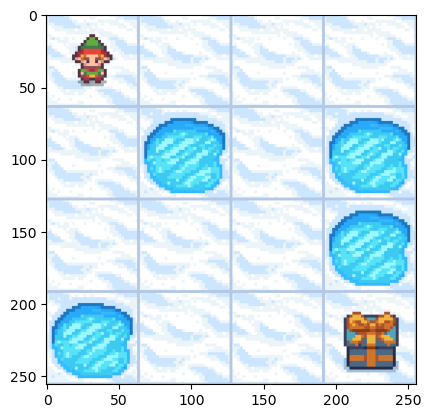

In [11]:
obs,info = env.reset()
img = env.render()
plt.imshow(img)

In [12]:
np.argmax(Q[4,])

np.int64(1)

In [13]:
env = gym.make("FrozenLake-v1",
               desc = None,
               map_name = '4x4',
               is_slippery = False,
               render_mode = 'human')

for i in range(20):
    state,_ = env.reset()
    done = False

    while not done:
        action = np.argmax(Q[state])
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = truncated or terminated
        state = next_state
env.close()
    
    
